# Decision Tree Practice

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from IPython.display import Image  
from collections import Counter
#import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:

########## Read all columns from a csv file ##########
df1 = pd.read_csv('flowersv1.csv', skipinitialspace=True, na_values=['NA', '.', '???'], skiprows=0, dtype={"email": str, "response": int}, chunksize=100000, iterator=True)
df = pd.concat(df1, ignore_index=True)
df.columns.str.replace("[ ]", "_")
df.rename(columns={'email':'ElectronicMail'}, inplace=True)
df.columns = df.columns.str.strip()
df.head() 


,Customer_ID,response,Purchases_in_3month,Purchases_in_6month,Purchases_in_12month,ElectronicMail,internet- Purchases,phone-purchases,Promo var-1,Promo Var-2,...,promo_code_12,total_discount_avail_12,avg_discount_avail_12,total_merchandise_amt_12,avg_merchandise_amt_12,TOTAL_ORDER_AMT_12,avg_TOTAL_ORDER_AMT_12,number_times_shipped_12,total_quantity_ordered_12,Time_since_last_purchase
0,1,0,0,0,3,0,4,0,2,2,...,1,4.5,1.5,84.97,28.323333,134.60,44.866667,2,3,9
1,2,0,0,0,1,0,3,0,3,0,...,0,0.0,0.0,49.99,49.990000,64.98,64.980000,0,1,7
2,3,0,0,1,2,0,2,0,0,2,...,0,0.0,0.0,114.98,57.490000,142.96,71.480000,2,2,4
3,4,0,0,2,2,0,3,0,1,2,...,0,0.0,0.0,74.98,37.490000,107.32,53.660000,1,2,3
4,5,0,0,0,1,0,1,0,0,1,...,1,0.0,0.0,29.99,29.990000,42.98,42.980000,1,1,6


In [4]:
########## Check distinct values in all columns ##########
for col in df:
    print (df[col].unique())
########## Drop columns which have onle one distinct value ##########
df = df[[c for c
        in list(df)
        if len(df[c].unique()) > 1]]
#df.drop(df.columns[[0, 1, 3]], axis=1)  #df.columns is zero-based pd.Index
print (df.dtypes)	

[     1      2      3 ... 806540 806541 806542]
[0 1]
[ 0  1  2  4  3  6  9  8  5 10  7 11 15 80 12 17 16 39 21 14 22 13 19 26
 23 18 50 52 29 33 20 27 30 38 36 25]
[  0   1   2   4   5   3   6   7   9   8  13  16  10  12  11  17  14  25
  20  22  15  21  80  18  19  28  39  26  40  24  27  23  37  35  34  58
 116  59  30  66  29  89  31  88  44  32  57  49]
[  3   1   2   4   6   0  11   5   7   8  10   9  14  12  13  25  20  30
  23  16  19  17  15  18  27  22  24  65  38  26  21  34  31  42  51  33
  92  36  29  45  28  32  43  47  39  82  35  44  41  62  68  61  40  37
  48  58  54 245  57  90  49  55 117  89 108  83  46  77]
['0']
[  4   3   2   1   0  10   6  13  12   5  11   7   9   8  18  20  15  28
  16  14  27  52  17  40  33  21  19  22  36  24  26  25  23  31  38  42
  32  91  44  41  39  37  34  43  46  30  50  35  48  29  62  55  59  69
  49  72  57  74  53  77  45  56  63 145 108  96  47  58  51 121  54  66
 227 261  61  89  65  83  60  73  76 104  95  99  98 496  68 201

In [6]:
########## Check unique values in response variable ##########
np.unique(df['response'].values)


array([0, 1])

In [7]:
########## Check for missing values and drop columns having missing values ##########
df.isnull().any()


Customer_ID                  False
response                     False
Purchases_in_3month          False
Purchases_in_6month          False
Purchases_in_12month         False
internet- Purchases          False
phone-purchases              False
Promo var-1                  False
Promo Var-2                  False
promo_code                   False
total_discount_avail         False
avg_discount_avail           False
total_merchandise_amt        False
avg_merchandise_amt          False
TOTAL_ORDER_AMT              False
avg_TOTAL_ORDER_AMT          False
number_times_shipped         False
total_quantity_ordered       False
promo_code_3                 False
total_discount_avail_3       False
avg_discount_avail_3         False
total_merchandise_amt_3      False
avg_merchandise_amt_3        False
TOTAL_ORDER_AMT_3            False
avg_TOTAL_ORDER_AMT_3        False
number_times_shipped_3       False
total_quantity_ordered_3     False
promo_code_6                 False
total_discount_avail

In [8]:
########## Change column data types as needed ##########
print (df.dtypes)
#df[['response']] = df[['response']].astype('int64')
df['response']= df['response'].astype(str)
print (df.dtypes)

Customer_ID                    int64
response                       int32
Purchases_in_3month            int64
Purchases_in_6month            int64
Purchases_in_12month           int64
internet- Purchases            int64
phone-purchases                int64
Promo var-1                    int64
Promo Var-2                    int64
promo_code                     int64
total_discount_avail         float64
avg_discount_avail           float64
total_merchandise_amt        float64
avg_merchandise_amt          float64
TOTAL_ORDER_AMT              float64
avg_TOTAL_ORDER_AMT          float64
number_times_shipped           int64
total_quantity_ordered         int64
promo_code_3                   int64
total_discount_avail_3       float64
avg_discount_avail_3         float64
total_merchandise_amt_3      float64
avg_merchandise_amt_3        float64
TOTAL_ORDER_AMT_3            float64
avg_TOTAL_ORDER_AMT_3        float64
number_times_shipped_3         int64
total_quantity_ordered_3       int64
p

In [9]:
########## Create features and label variables ##########
X = df.drop('response', axis=1)
X = X.drop('Customer_ID', axis=1)
Y = df.loc[:, 'response']
print(X)
print(Y)

        Purchases_in_3month  Purchases_in_6month  Purchases_in_12month  \
0                         0                    0                     3   
1                         0                    0                     1   
2                         0                    1                     2   
3                         0                    2                     2   
4                         0                    0                     1   
5                         0                    0                     1   
6                         0                    0                     2   
7                         0                    0                     1   
8                         0                    0                     4   
9                         0                    0                     2   
10                        0                    0                     1   
11                        0                    0                     1   
12                        0           

In [10]:
########## split data into training and test set ##########
#random_state variable is a pseudo-random number that generator state used for random sampling. If you want to replicate this result then use this value of random_state=100
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)
y_train.value_counts()


0    518565
1     46014
Name: response, dtype: int64

In [11]:
########## Decision Tree classifier with information gain ##########
clf_entropy = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=10, min_samples_leaf=5) #you can use random_state=100
clf_ent_fit = clf_entropy.fit(X_train, y_train)
#print all unique predictions

y_pred_en = clf_ent_fit.predict(X_test)
y_pred_en
print ("Entropy Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

tmp=set(y_pred_en)
print(tmp)

Entropy Accuracy is  91.70947624223538
{'1', '0'}


In [12]:
########## Confusion Matrix ##########
results = confusion_matrix(y_test, y_pred_en, labels=["0", "1"])
print(results)


[[221752    274]
 [ 19786    151]]


In [13]:
########## Decision tree classifier with gini index ##########
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini_fit = clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini_fit.predict(X_test)
y_pred_gini
print ("Gini Accuracy is ", accuracy_score(y_test,y_pred_gini)*100)

Gini Accuracy is  91.76031046069028


In [20]:


# dot_data = StringIO()
# export_graphviz(clf_ent_fit, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# #Image(graph.create_png())
# #graph.write_pdf("pic.pdf")
# graph

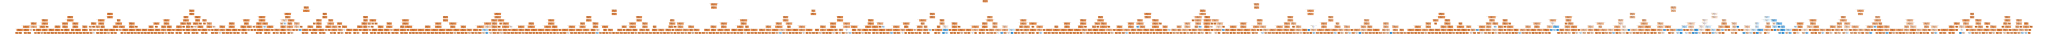

In [12]:
import os
os.environ["PATH"] += os.pathsep + 'D:/ProgramData/graphviz-2.38/release/bin'

## Visualize decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(clf_ent_fit, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))